# COLOR EVOLUTION, COMPARISON WITH LITERATURE

26-04-2023: expanded the compatibility to 3sigma

25-04-2023: merged similar filters, ugriz and u'g'r'i'z', K Ks K'

16-04-2023: 
We applied the 2.5% criteria in the whole LC

29-03-2023: 
Biagio -> I corrected the weights definition as 1/y_err rather than 1/y_err^2 ; I added the right comment if |slope_err/slope|>1 then it is compatible in 1sigma and there is no color evolution 

### Imports

In [ ]:
#The following warning has been ignored, keep in mind when inserting this code in the grblc package
#C:\Users\biagi\AppData\Local\Temp\ipykernel_2268\907779747.py:51: FutureWarning:
#Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.

In [1]:
import os

import pandas as pd
import numpy as np
from lmfit.models import LinearModel

import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import warnings
warnings.filterwarnings("ignore")
directory = os.getcwd()

In [2]:
# create a list of the path of all our example grbs.
import os
import pandas as pd
import sys
sys.path.append('D:/grb/grbLC/')
from grblc.evolution.lightcurve import Lightcurve

path = "D:\grb\sample\mag-AB-extcorr-03-05-2023"
grblist = []
filelist = []

for root, dirs, files in os.walk(path):
    for file in files:
        filelist.append(os.path.join(root,file))
        names = file.split('_')
        grblist.append(names[0])

filedf=pd.DataFrame()
filedf.index = grblist
filedf['path'] = filelist

In [6]:
redo = pd.read_csv('checking-mag-values.csv', sep=',', index_col='GRB')
redo = redo[redo['Agreement_with_literature(our_col-ev)'] == 'DISAGREEMENT']

In [13]:
redo= ['120119A']

### COLOR EVOLUTION ANALYSIS


####################################################################################################

120119A
List of filters in the form: [Filter,number of points that have this filter]
[['R', 94], ['I', 84], ['J', 44], ['K', 43], ['H', 42], ['r', 42], ['unfiltered', 38], ['Clear', 24], ['B', 18], ['i', 15], ['V', 8], ['z', 7], ['g', 3], ['white', 3]]
 
The most numerous filter is considered for rescaling
The most numerous filter of this GRB:  R , with 94 occurrences


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


-\|/-|/-\|/-|/-\|/-|/-\|/-|/-\|/-|/-\|/-|/-\|/-|/-\|/-|/-\|/-|/
         band  Occur_fil  Log10(t)  Resc_fact  Resc_fact_err  \
0  unfiltered         38  1.885926   0.050738       0.156525   
1           I         84  1.895533   1.155101       0.191050   
2           I         84  1.969928   1.295101       0.471699   
3  unfiltered         38  1.973959   0.230738       0.444072   
4           I         84  2.073242   1.505101       0.143178   

   Resc_fact_weights  
0           6.388766  
1           5.234239  
2           2.119996  
3           2.251887  
4           6.984303  
Rescaling results
------------------
             slope slope_err intercept inter_err acceptance  \
i           0.0418    0.2004    0.4132    0.6303     4.7943   
K          -0.4361    0.0914    6.3928    0.2856     0.2096   
J          -0.2613    0.0724    3.6265    0.2276     0.2771   
unfiltered  0.0094    0.0384    0.1944    0.1215     4.0851   
g              NaN       NaN       NaN       NaN        NaN  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

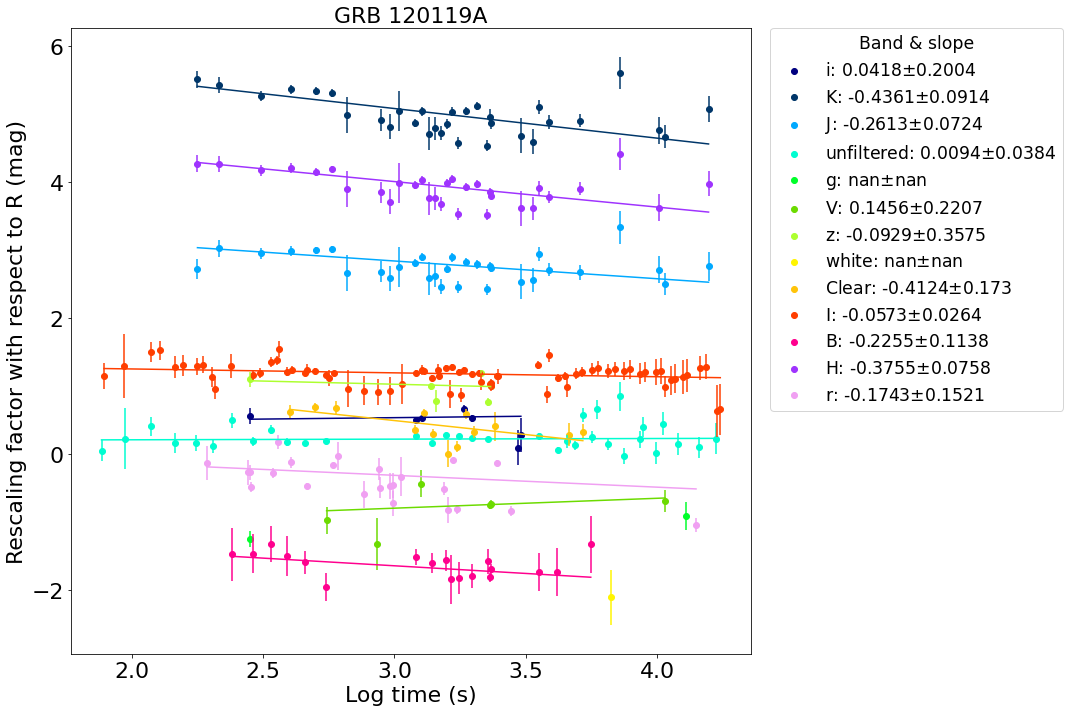

In [14]:
# LM FITTING

#for root, dirs, files in os.walk(path):
for grbtitle in redo:

    print("\n"+ str(100*"#") +"\n")
    #grbtitle=i.replace("/content/drive//MyDrive/gamma-ray-gang/sample/527GRBS_mag_with_telescope&systeminfo/Ready_for_Ridha(completefiles)/GRBs_AB+galextcorr_08-02-2023/","").replace("_mag_AB_galextcorr.txt","")
    print(grbtitle)

    try:
        light = pd.read_csv(filedf.loc[grbtitle, 'path'], sep=r"\t+\s+", engine="python", header=None, index_col=0).sort_values(by=['time_sec'])
        light=light[light['mag_err'] != 0]
        if light.empty:
            print(i+" has only limiting magnitudes, thus it will be skipped")
            print("\n"+ str(100*"-") +"\n")
            continue
        color=(light[3].values).to_list()
        print(color)

        filterslist=[[x,color.count(x)] for x in set(color)]
        freq=[]
        for k in color:
            for j in filterslist:
                if j[0]==k:
                    freq.append(str(k)+' ('+str(j[1])+')')

        fig = px.scatter(
                    data_frame=light,
                    x=np.log10(light[0].values),
                    y=-light[1].values,
                    error_y=light[2].values,
                    color=color,
                    hover=light[7].values,
                    title=grbtitle,
                )
        
        fig.update_layout(
                    xaxis_title='log Time (s)',
                    yaxis_title='mag'
                )
        #fig.show()
        
        if len(freq)==1:
            print(i+" has only one data point along all the LC, thus no rescaling is needed")
            print("\n"+ str(100*"-") +"\n")
            continue
        
    except:
        light = pd.read_csv(filedf.loc[grbtitle, 'path'], sep=r"\t+|\s+", engine="python", header=0).sort_values(by=['time_sec'])#, index_col=0)
        light=light[light['mag_err'] != 0]
        if light.empty:
            print(i+" has only limiting magnitudes, thus it will be skipped")
            print("\n"+ str(100*"-") +"\n")
            continue       
        color=(light['band']).to_list()
        filterslist=[[x,color.count(x)] for x in set(color)]
        freq=[]
        for k in color:
            for j in filterslist:
                if j[0]==k:
                    freq.append(str(k)+' ('+str(j[1])+')')
        
        fig = px.scatter(
            data_frame=light,
            x=np.log10(light['time_sec'].values),
            y=-light['mag'].values,
            error_y= light['mag_err'].values,
            color=freq,
            hover_data=['source'],
            title=grbtitle,
        )
        
        fig.update_layout(
            xaxis_title='log Time (s)',
            yaxis_title='mag'
        )
        
        #fig.show()
        
        if len(freq)==1:
            print(i+" has only one data point along all the LC, thus no rescaling is needed")
            print("\n"+ str(100*"-") +"\n")
            continue        
        
    light = pd.read_csv(filedf.loc[grbtitle, 'path'], sep=r"\t+|\s+", engine="python", header=0).sort_values(by=['time_sec'])#, index_col=0)
    light=light[light['mag_err'] != 0]
    if light.empty:
        print(i+" has only limiting magnitudes, thus it will be skipped")
        print("\n"+ str(100*"-") +"\n")
        continue
    x=np.log10(light['time_sec'].values)
    y=light['mag'].values
    error_y= light['mag_err'].values
    color=(light['band']).to_list()
    sys=(light['system']).to_list()
    telescope=(light['telescope']).to_list()
    galextcorr=(light['extcorr']).to_list()
    source=(light['source']).to_list()
    
    for jjj in range(len(color)):
        if color[jjj]=="u'":
            color[jjj]="u"
        if color[jjj]=="g'":
            color[jjj]="g"            
        if color[jjj]=="r'":
            color[jjj]="r"
        if color[jjj]=="i'":
            color[jjj]="i"            
        if color[jjj]=="z'":
            color[jjj]="z"            
        if color[jjj]=="BJ":
            color[jjj]="B"            
        if color[jjj]=="VJ":
            color[jjj]="V"
        if color[jjj]=="UJ":
            color[jjj]="U"            
        if color[jjj]=="RM":
            color[jjj]="R"             
        if color[jjj]=="BM":
            color[jjj]="B"
        if color[jjj]=="UM":
            color[jjj]="U"            
        if color[jjj]=="KS":
            color[jjj]="K"  
        if color[jjj]=="Ks":
            color[jjj]="K" 
        if color[jjj]=="K'":
            color[jjj]="K"
        if color[jjj]=="Kp":
            color[jjj]="K"
            
    filterslist=[[x,color.count(x)] for x in set(color)]
    
    freq=[]
    freq1=[]
    freqfinal=[]
    for k in color:
        for j in filterslist:
            if j[0]==k:
                freq.append(str(k)+' ('+str(j[1])+')')
                freq1.append([k,j[1]])
                freqfinal.append(j[1])
    
    freq_set = set(tuple(x) for x in freq1)
    occurrences = [list(x) for x in freq_set]
    sortedoccur=sorted(occurrences,key=lambda x: int(x[1]),reverse=True)
    
    print('List of filters in the form: [Filter,number of points that have this filter]')
    print(sortedoccur)
    print(' ')
    
    # When we assign the filterposition variable, we are placing another filter in place of the most numerous
    filterposition=0 # for example, with filterposition=1 we are considering the second most numerous filter for rescaling
    # for example, if we put 4 we are cosidering the third most numerous filter (due to Python counting with zero as first element etc.)
    
    if filterposition!=0:
        #print('According to the position of the needed filter in the list, we are considering the filter n.',filterposition+1,' for rescaling')
        sortedoccur[0],sortedoccur[filterposition]=sortedoccur[filterposition],sortedoccur[0]
        #print('List with changed filters')
        print(sortedoccur)
        print(' ')
    else:
        print('The most numerous filter is considered for rescaling')
    
    
    # Identifying the most numerous filter and the second most numerous in the GRB 
    mostcommonfilter=sortedoccur[0][0]
    
    if len(sortedoccur)==1:
        print(i+" has only one filter along all the LC, thus no rescaling is needed")
        continue
    
    print('The most numerous filter of this GRB: ',sortedoccur[0][0],', with', sortedoccur[0][1], 'occurrences')
    
    secondcommonfilter=sortedoccur[1][0]
    
    # Defining the overlap function: this function tells you if two ranges of real numbers overlap
    # So, if we consider the ranges (logflux-err,logflux+err) we can compare if two error bars overlap
    
    def overlap(start1, end1, start2, end2):
        #how much does the range (start1, end1) overlap with (start2, end2)
        return max(max((end2-start1), 0) - max((end2-end1), 0) - max((start2-start1), 0), 0)
    
    # LET'S GO; WE HERE RESCALE ACCORDING TO THE MOST NUMEROUS FILTER

    # We here create the sublist of data points that have the most common filter
    
    mostcommonlight=light.loc[light['band'] == mostcommonfilter].to_dict('subset')
    mostcommonx=np.log10(mostcommonlight['time_sec'].values)
    mostcommony=mostcommonlight['mag'].values
    mostcommonerror_y=mostcommonlight['mag_err'].values
    mostcommonsys=(mostcommonlight['system']).to_list()
    mostcommontelescope=(mostcommonlight['telescope']).to_list()
    mostcommongalextcorr=(mostcommonlight['extcorr']).to_list()
    mostcommonsource=(mostcommonlight['source']).to_list()
    
    # Second step: find the minimum time difference between the most common and the next filter in order of occurrences
    
    # Here we start to create a list that contains the rescaling factors for every filter after the most common
    # The structure is (filtername, number of points, list of rescaling factors (up to 6))
    # scalingfactorslist=[[sortedoccur[0][0],sortedoccur[0][1],[0]]]
    
    scalingfactorslist2=[[sortedoccur[0][0],sortedoccur[0][1],[[0,0,0]]]]

    
    
    # Here we re-import the GRB data (A RE-IMPORTATION IS HEAVY IN CODING AND NOT NECESSARY, THIS CAN BE IMPROVED)
    lightresc = pd.read_csv(filedf.loc[grbtitle, 'path'], sep=r"\t+|\s+", engine="python", header=0).sort_values(by=['time_sec'])#, index_col=0)
    lightresc=lightresc[lightresc['mag_err'] != 0]
    if lightresc.empty:
        print(i+" has only limiting magnitudes, thus it will be skipped")
        continue  
    rescx=np.log10(lightresc['time_sec'].values)
    rescy=lightresc['mag'].values
    resccolor=lightresc['band'].values

    for jjj in range(len(resccolor)):
        if resccolor[jjj]=="u'":
            resccolor[jjj]="u"
        if resccolor[jjj]=="g'":
            resccolor[jjj]="g"            
        if resccolor[jjj]=="r'":
            resccolor[jjj]="r"
        if resccolor[jjj]=="i'":
            resccolor[jjj]="i"            
        if resccolor[jjj]=="z'":
            resccolor[jjj]="z"            
        if resccolor[jjj]=="BJ":
            resccolor[jjj]="B"            
        if resccolor[jjj]=="VJ":
            resccolor[jjj]="V"
        if resccolor[jjj]=="UJ":
            resccolor[jjj]="U"            
        if resccolor[jjj]=="RM":
            resccolor[jjj]="R"             
        if resccolor[jjj]=="BM":
            resccolor[jjj]="B"
        if resccolor[jjj]=="UM":
            resccolor[jjj]="U"            
        if resccolor[jjj]=="KS":
            resccolor[jjj]="K"  
        if resccolor[jjj]=="Ks":
            resccolor[jjj]="K"     
        if resccolor[jjj]=="K'":
            resccolor[jjj]="K" 
        if resccolor[jjj]=="Kp":
            resccolor[jjj]="K" 
            
    rescerror_y= lightresc['mag_err'].values
    reschover_data=lightresc['source'].values
    rescsys=(lightresc['system']).to_list()
    resctelescope=(lightresc['telescope']).to_list()
    rescgalextcorr=(lightresc['extcorr']).to_list()    
    

    lightresc2=lightresc.loc[(np.log10(lightresc['time_sec']) > 0)].to_dict('lightresc1')
    rescx2=np.log10(lightresc2['time_sec'])
    rescy2=lightresc2['mag']
    resccolor2=lightresc2['band']
    rescerror_y2= lightresc2['mag_err']
    reschover_data2=lightresc2['source']    
    rescsys2=lightresc2['system']
    resctelescope2=lightresc2['telescope']
    rescgalextcorr2=lightresc2['extcorr']     
    
    
    resc2freq=[]
    for k in resccolor2:
        for j in filterslist:
            if j[0]==k:
                resc2freq.append([k,j[1]])
    
    resc2freq_set = set(tuple(x) for x in resc2freq)
    occurrences2 = [list(x) for x in resc2freq_set]
    sortedoccur2 = sorted(occurrences2,key=lambda x: int(x[1]),reverse=True)
    
    #print('List of filters in the form: [Filter,number of points that have this filter]')
    #print(sortedoccur)
    #print(' ')
    
    mostcommonlight2=light.loc[(lightresc['band'] == mostcommonfilter) & (np.log10(lightresc['time_sec']) > 0)].to_dict('list')
        
    mostcommonx2=np.log10(mostcommonlight2['time_sec'])
    mostcommony2=mostcommonlight2['mag']
    mostcommonerror_y2=mostcommonlight2['mag_err']
    mostcommonsys2=mostcommonlight2['system']
    mostcommontelescope2=mostcommonlight2['telescope']
    mostcommongalextcorr2=mostcommonlight2['extcorr']
    mostcommonsource2=mostcommonlight2['source']    
    
    
    for j in range(1,len(sortedoccur2)):
        scalingfactorslist2.append([sortedoccur2[j][0],sortedoccur2[j][1],[]])
    
    evolutionrescalingfactor2=[]
    
    for j in range(1,len(sortedoccur2)):
        
        sublight=light.loc[(lightresc['band'] == sortedoccur2[j][0]) 
                                    & (np.log10(lightresc['time_sec']) > 0)].to_dict('subset')
        subx=np.log10(sublight['time_sec'].values)
        suby=sublight['mag'].values
        suberror_y=sublight['mag_err'].values
        
        timediff = [[p1,p2] for p1 in range(len(mostcommonx2)) for p2 in range(len(subx)) if np.log10(np.abs(10**mostcommonx2[p1]-10**subx[p2]))<=np.log10((10**mostcommonx2[p1])*2.5/100)]
        #timediffcoinc = [[p1,p2] for p1 in range(len(mostcommonx2)) for p2 in range(len(subx)) if np.abs(mostcommonx2[p1]-subx[p2])<=1e-20]

        if len(timediff)!=0:
            for ll in timediff:
                sf2=[subx[ll[1]],mostcommony2[ll[0]]-suby[ll[1]],np.log10(np.abs(10**mostcommonx2[ll[0]]-10**subx[ll[1]])),(mostcommonerror_y2[ll[0]]**2+suberror_y[ll[1]]**2)**(1/2)]
                scalingfactorslist2[j][2].append(sf2)
        
        #if len(timediffcoinc)==0 and len(timediff)==0:
        if len(timediff)==0:
            continue
            # We here define the re-scaling constant between the most common band and the j-th band (in order of occurencies)
    
    
    #scalingfactorslistjunction2to3=[[sortedoccur[0][0],sortedoccur[0][1],[[0,0,0]]]]   
    
    #print(scalingfactorslist2)
    
    for fl in scalingfactorslist2:

        times=set(el[0] for el in fl[2])
        
        
        for tt in times:
            suppllist=[fl[2][x] for x in range(len(fl[2])) if fl[2][x][0]==tt]
            suppllistdist=[fl[2][x][2] for x in range(len(fl[2])) if fl[2][x][0]==tt]     
            
            mindistpos=suppllistdist.index(min(suppllistdist))
            
            evolutionrescalingfactor2.append([fl[0],fl[1],suppllist[mindistpos]])    
            
          
    finalevolutionlist=evolutionrescalingfactor2 #+evolutionrescalingfactor2+evolutionrescalingfactorjunction2to3 #+evolutionrescalingfactor3+evolutionrescalingfactor4+evolutionrescalingfactor5+evolutionrescalingfactor6+evolutionrescalingfactorjunction3to4+evolutionrescalingfactorjunction4to5+evolutionrescalingfactorjunction5to6+evolutionrescalingfactorjunction6up
    
    #print(finalevolutionlist)
    
    finalevolutionlist=sorted(finalevolutionlist, key=lambda finalevolutionlist: finalevolutionlist[2][0])
    #print('Final evolution list')
    #print(finalevolutionlist)
    print("-\|/-|/-\|/-|/-\|/-|/-\|/-|/-\|/-|/-\|/-|/-\|/-|/-\|/-|/-\|/-|/")
    colorevolfilt=[jj[0] for jj in finalevolutionlist if jj[0]!=mostcommonfilter]
    colorevoloccur=[jj[1] for jj in finalevolutionlist if jj[0]!=mostcommonfilter]
    colorevoltime=[jj[2][0] for jj in finalevolutionlist if jj[0]!=mostcommonfilter]
    colorevolrescfact=[jj[2][1] for jj in finalevolutionlist if jj[0]!=mostcommonfilter]
    colorevolrescfacterr=[jj[2][3] for jj in finalevolutionlist if jj[0]!=mostcommonfilter]
    colorevolrescfactweights=[(1/jj[2][3]) for jj in finalevolutionlist if jj[0]!=mostcommonfilter]
    
    #print('Rescaling factor time:')
    #print(colorevoltime)
    #print('Rescaling factor:')
    #print(colorevolrescfact)
    #print('Rescaling factor error:')
    #print(colorevolrescfacterr)
    
    rescalingfactorsframe=pd.DataFrame(list(zip(colorevolfilt,colorevoloccur,colorevoltime,colorevolrescfact,
                                                colorevolrescfacterr,colorevolrescfactweights)),columns=['band','Occur_fil','Log10(t)','Resc_fact','Resc_fact_err','Resc_fact_weights'])
    print(rescalingfactorsframe.head())
    
    filtersplit=set(colorevolfilt)
    #print(filtersplit)
  
    filtersatleast3data=[]
    for jj in filtersplit:
        subframe=rescalingfactorsframe.loc[rescalingfactorsframe['band']==jj]
        if len(subframe)>2:
            filtersatleast3data.append(jj)
    
    if len(filtersatleast3data)==0:
        print('No filter with at least 3 rescaling factors to be fitted')
        continue

    print('Rescaling results\n------------------')

    ## RIDHA'S PART

    x_all = rescalingfactorsframe['Log10(t)']
    y_all = rescalingfactorsframe['Resc_fact']
    yerr_all = rescalingfactorsframe['Resc_fact_err']
    filters = [*set(rescalingfactorsframe['band'].values)]
    rescalingfactorsframe['plot_color'] = ""

    #fig2 = px.scatter(
    #       data_frame=rescalingfactorsframe,
      #      x=rescalingfactorsframe['Log10(t)'].values,
      #     y=rescalingfactorsframe['Resc_fact'].values,
        #    error_y= rescalingfactorsframe['Resc_fact_err'].values,
        #   color=rescalingfactorsframe['band'].values,
          #  hover_data=['band'],
          # title="Rescaling plot",
    #)
    #fig2.update_layout(
    #   xaxis_title='log Time (s)',
      #  yaxis_title='Rescaling factor'
    #)
    
    #plt.scatter(x, y, label='Rescale factors')
    # Set the color map to match the number of filter
    cmap = plt.get_cmap('gist_ncar')
    cNorm  = colors.Normalize(vmin=0, vmax=len(filters))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

    # Plot each species
    for i, band in enumerate(filters):
      colour = scalarMap.to_rgba(i)
      index = rescalingfactorsframe['band'] == band
      plt.scatter(x_all[index], y_all[index],
                  s=15, 
                  color=colour)#, 
                  #label=filters[i])
      plt.errorbar(x_all[index], y_all[index], yerr_all[index],
                  fmt='o',
                  barsabove=True,
                  ls='',
                  color=colour
                  )
      for j in rescalingfactorsframe[index].index:
        rescalingfactorsframe.at[j,"plot_color"] = colour


    resc_slopes_df = pd.DataFrame()
    resc_slopes_df.index = filters
    resc_slopes_df['slope'] = ""
    resc_slopes_df['slope_err'] = ""
    resc_slopes_df['intercept'] = ""
    resc_slopes_df['inter_err'] = ""
    resc_slopes_df['acceptance'] = ""
    resc_slopes_df['red_chi2'] = ""
    resc_slopes_df['comment'] = ""
    resc_slopes_df['plot_color'] = ""

    for band in resc_slopes_df.index:
      
      ind = rescalingfactorsframe.index[rescalingfactorsframe['band'] == band][0]
      resc_slopes_df.loc[band]['plot_color'] = rescalingfactorsframe.loc[ind]["plot_color"]

      resc_band_df = rescalingfactorsframe[rescalingfactorsframe['band'] == band]

      x = resc_band_df['Log10(t)']
      y = resc_band_df['Resc_fact']
      weights = resc_band_df['Resc_fact_weights']

    
      ## lmfit linear

      if len(x) >= 3:
        linear_model = LinearModel(prefix='line_')
        linear_params = linear_model.make_params()
        
        linear_params['line_slope'].set(value=-1.0)
        linear_params['line_intercept'].set(value=np.max(y))

        linear_fit = linear_model.fit(y, params=linear_params, x=x, weights=weights)
        
        #print(linear_fit.redchi)
        #print(linear_fit.fit_report())
        
        resc_slopes_df.loc[band]['slope'] = np.around(linear_fit.params['line_slope'].value, decimals=4)
        resc_slopes_df.loc[band]['slope_err'] = np.around(linear_fit.params['line_slope'].stderr, decimals=4)
        resc_slopes_df.loc[band]['intercept'] = np.around(linear_fit.params['line_intercept'].value, decimals=4)
        resc_slopes_df.loc[band]['inter_err'] = np.around(linear_fit.params['line_intercept'].stderr, decimals=4)
        resc_slopes_df.loc[band]['acceptance'] = np.around(np.abs(resc_slopes_df.loc[band]['slope_err']/resc_slopes_df.loc[band]['slope']), decimals=4)
        resc_slopes_df.loc[band]['red_chi2'] = np.around(linear_fit.redchi, decimals=4)
        
      else: # not enough data points
        resc_slopes_df.loc[band]['slope'] = np.nan
        resc_slopes_df.loc[band]['slope_err'] = np.nan
        resc_slopes_df.loc[band]['intercept'] = np.nan
        resc_slopes_df.loc[band]['inter_err'] = np.nan
        resc_slopes_df.loc[band]['acceptance'] = np.nan
        resc_slopes_df.loc[band]['comment'] = "insufficient data"
        resc_slopes_df.loc[band]['red_chi2'] = 'insufficient data'
        
      if resc_slopes_df.loc[band]['slope'] != np.nan:
        if resc_slopes_df.loc[band]['acceptance'] < 10000: #put ad-hoc to have all the plots

            y_fit = resc_slopes_df.loc[band]['slope'] * x + resc_slopes_df.loc[band]['intercept']
            y_fit_err = resc_slopes_df.loc[band]['slope_err'] * x + resc_slopes_df.loc[band]['inter_err']

            plt.plot(x, y_fit, 
                    color=resc_slopes_df.loc[band]["plot_color"])#,
                    #label=str(band+ ": " + str(resc_slopes_df.loc[band]["slope"]) + r'$\pm$' + str(resc_slopes_df.loc[band]["slope_err"])))
            #plt.fill_between(x, y_fit - y_fit_err, y_fit + y_fit_err,
            #                color=resc_slopes_df.loc[band]["plot_color"],
            #                alpha=0.25
            #                ) # error range for fit

            if np.abs(resc_slopes_df.loc[band]['slope']) < 0.1:
                resc_slopes_df.loc[band]['comment'] = "no color evolution"
            elif resc_slopes_df.loc[band]['slope']-(3*resc_slopes_df.loc[band]['slope_err'])<=0<=resc_slopes_df.loc[band]['slope']+(3*resc_slopes_df.loc[band]['slope_err']):
                resc_slopes_df.loc[band]['comment'] = "no color evolution"
            # elif np.abs(resc_slopes_df.loc[band]['slope_err'])/np.abs(resc_slopes_df.loc[band]['slope'])>=1.0:
            #     resc_slopes_df.loc[band]['comment'] = "no colour evolution"
            else:    
                resc_slopes_df.loc[band]['comment'] = "slope >= 0.1"

        else:
            resc_slopes_df.loc[band]['comment'] = "slope=nan"
        # color_evl_test = []
        # if np.abs(resc_slopes_df.loc[band]['resc_slope']) < 0.1:
        #    message = "There was no color evolution in {} band.\n".format(band)
        #    color_evl_test = color_evl_test.append(message)
        # else:
        #    message = "{} band failed the <0.1 test. \n".format(band)
        #    color_evl_test = color_evl_test.append(message)


                 
    resc_slopes_df = resc_slopes_df.drop('plot_color', axis=1)
    print(resc_slopes_df)
    # print(color_evl_test)

    def overlap(start1, end1, start2, end2):
        """Does the range (start1, end1) overlap with (start2, end2)?"""
        return end1 >= start2 and end2 >= start1    
    
    compatibilitylist=[]
    
    for band in resc_slopes_df.index:
        if resc_slopes_df.loc[band]['slope']!=0 and resc_slopes_df.loc[band]['slope_err']!=0:
            compatibilitylist.append([band,[resc_slopes_df.loc[band]['slope']-(3*resc_slopes_df.loc[band]['slope_err']),
                                      resc_slopes_df.loc[band]['slope']+(3*resc_slopes_df.loc[band]['slope_err'])]])
        else:
            continue
        
#     #print(compatibilitylist)    

    compzerolist=[]
    nocompzerolist=[]
    for l in compatibilitylist:
        if l[1][0]<=0<=l[1][1] or np.abs((l[1][0]+l[1][1])/2)<0.10:
                compzerolist.append(l[0])
        else:
            nocompzerolist.append(l[0])
    
    print('\n')

    if len(compzerolist)==0:
        print('No filters compatible with zero in 3sigma or with |slope|<0.1')
        
    else:
        print('Filters compatible with zero in 3sigma: ',*compzerolist)
    
    if len(nocompzerolist)==0:
        print('No filters with |slope|>0.1 or compatible with zero only in >3sigma')
        
    else:
        print('Filters not compatible with zero in 3sigma or with |slope|>0.1: ',*nocompzerolist)    

    print('\n')
    print('No color evolution: ',*compzerolist,' ; Color evolution: ',*nocompzerolist)        

    
    string=""
    for band in resc_slopes_df.index:
            
        string=string+band+":"+str(round(resc_slopes_df.loc[band]['slope'],3))+"+/-"+str(round(resc_slopes_df.loc[band]['slope_err'],3))+"; "

    for band in resc_slopes_df.index:
      
      ind = rescalingfactorsframe.index[rescalingfactorsframe['band'] == band][0]
      color = rescalingfactorsframe.loc[ind]["plot_color"]
      plt.scatter(x=[], y=[], 
                  c=color, 
                  label=band+": "+ str(resc_slopes_df.loc[band]["slope"]) + r'$\pm$' + str(resc_slopes_df.loc[band]["slope_err"])
                  )
    
    plt.rcParams['legend.title_fontsize'] = 'xx-large'
    #plt.title('Rescaling factors for '+ str(grbtitle),fontsize=18)
    plt.xlabel('Log time (s)',fontsize=22)
    plt.ylabel('Rescaling factor with respect to '+mostcommonfilter+' (mag)',fontsize=22)
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.title("GRB "+str(grbtitle), fontsize=22)
    plt.legend(title='Band & slope', bbox_to_anchor=(1.015, 1.015), loc='upper left', fontsize='xx-large')    
    plt.tight_layout()
    plt.savefig("new-plots/"+str(grbtitle)+'_colorevol.pdf') #DECOMMENT TO EXPORT THE PLOTS
    plt.show()